# importing libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download data
if you dont have the dataset you can use this function to download it.

In [81]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

# Read datased

In [82]:
dataset = pd.read_csv("datasets/housing/housing.csv")

In [70]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [83]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [84]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


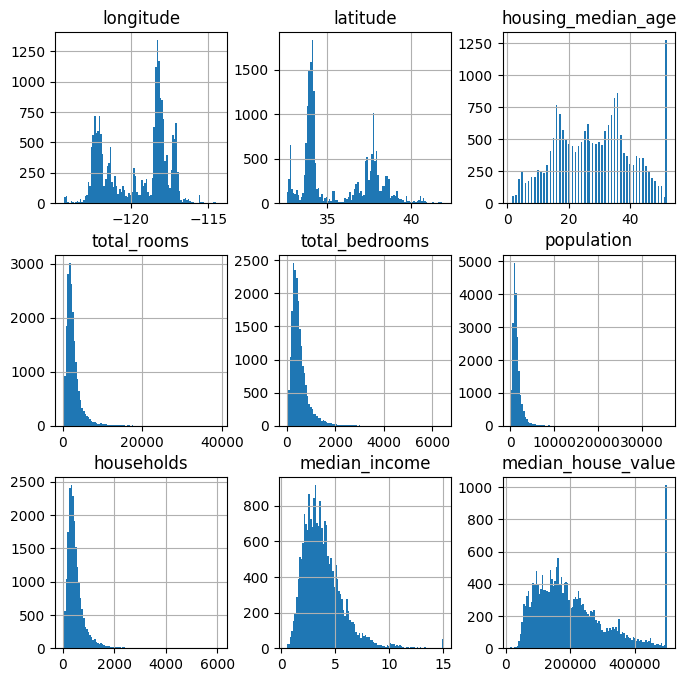

In [85]:
dataset.hist(figsize=(8,8),bins=100)
plt.show()

In [86]:
dataset["income_cat"] = pd.cut(dataset["median_income"],
bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
labels=[1, 2, 3, 4, 5])



What does this mean?

When you randomly split data without considering income, you might end up with something like:

The training group is mostly made up of people with high incomes.

And the test group is mostly made up of people with low incomes.

In that case, the model will learn incorrectly because the distribution isn't balanced.

But when we perform a Stratified Split on "income_cat," we ensure that each income bracket (low, middle, high, etc.) is represented in roughly the same proportion in both the training and test groups.

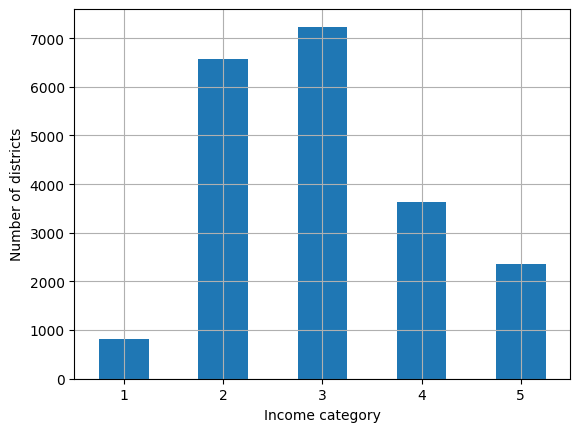

In [87]:
dataset["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [88]:
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


When dividing data into a training and a test set, we want to maintain the same percentage for each income bracket in both sets.

This is called stratified sampling.

In [89]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    dataset,
    test_size=0.2,
    stratify=dataset["income_cat"],
    random_state=42
)


Let’s see if this worked as expected. You can start by looking at the
income category proportions in the test set:

In [90]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


You won’t use the income_cat column again, so you might as well
drop it, reverting the data back to its original state:

In [91]:

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [ ]:
strat_train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


# Explore and Visualize the Data to Gain Insights

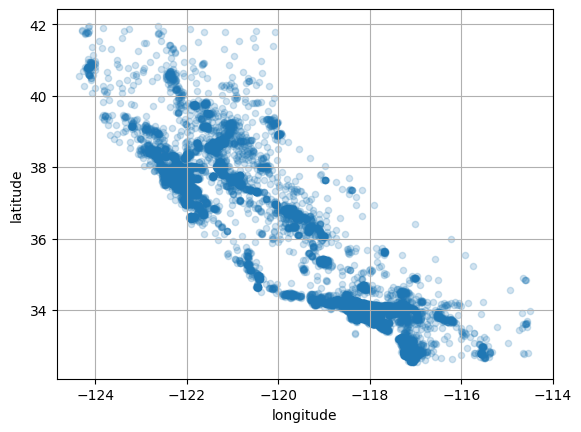

In [92]:
housing = strat_train_set.copy()
#0.2 makes it much easier to visualize the places where there is a high density of data points
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,alpha=.2)
plt.show()

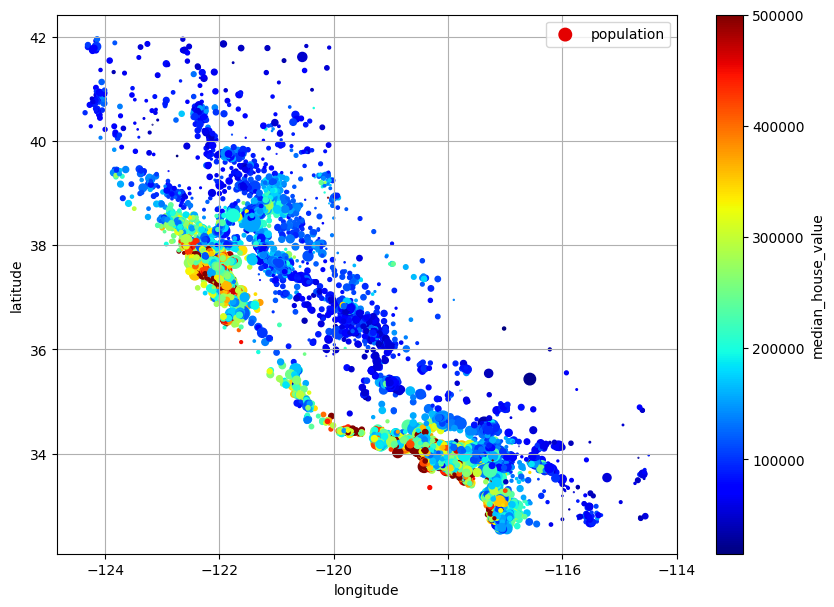

In [16]:
# each circle represents the district’s population (option s), and the color represents the price
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
s=housing["population"] / 100, label="population",
c="median_house_value", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))
plt.show()

This image tells you that the housing prices are very much related
to the location (e.g., close to the ocean) and to the population
density

 ## Look for Correlations

In [17]:
housing = pd.get_dummies(
    housing,
    columns=['ocean_proximity'],
    dtype=float,
    drop_first=True
)
# drop first to avoid dummy trap

corr_matrix = housing.corr()
# Now you can look at how much each attribute correlates with the median house value:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
ocean_proximity_NEAR BAY,0.166398
ocean_proximity_NEAR OCEAN,0.138747
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
ocean_proximity_ISLAND,0.023258
population,-0.020153


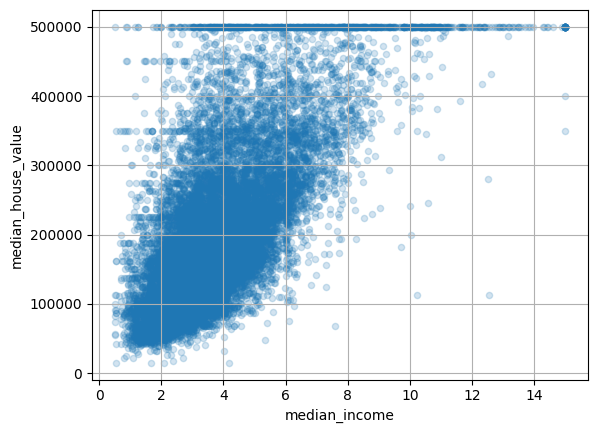

In [18]:
#the most promising attribute to predict the median house value is median_income
housing.plot(kind="scatter", x="median_income", y="median_house_value",
alpha=0.2, grid=True)
plt.show()

In [19]:
# adding new features
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

# then you look at the correlation matrix again
corr_matrix = housing.corr()
# Now you can look at how much each attribute correlates with the median house value:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
ocean_proximity_NEAR BAY,0.166398
rooms_per_house,0.143663
ocean_proximity_NEAR OCEAN,0.138747
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
ocean_proximity_ISLAND,0.023258


Value Meaning

🔹 Close to +1: Strong positive correlation (one increases → the other increases)
🔹 Close to -1: Strong negative correlation (one increases → the other decreases)
🔹 Close to 0: No clear correlation

In [20]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_house,bedrooms_ratio,people_per_house
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,0.0,0.0,1.0,0.0,3.211799,0.335742,1.524178
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,0.0,0.0,0.0,0.0,5.504202,0.180153,1.865546
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,1.0,0.0,0.0,0.0,5.334975,0.200369,2.768473
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,1.0,0.0,0.0,0.0,5.351282,0.203881,2.365385
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,0.0,0.0,0.0,1.0,3.725256,0.277371,1.631399


## Prepare the Data for Machine Learning Algorithms


In [21]:
housing_labels = housing["median_house_value"].copy()
housing = housing.drop("median_house_value", axis=1)


In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_house,bedrooms_ratio,people_per_house
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,0.0,0.0,1.0,0.0,3.211799,0.335742,1.524178
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,0.0,0.0,0.0,0.0,5.504202,0.180153,1.865546
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,1.0,0.0,0.0,0.0,5.334975,0.200369,2.768473
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,1.0,0.0,0.0,0.0,5.351282,0.203881,2.365385
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,0.0,0.0,0.0,1.0,3.725256,0.277371,1.631399


## Clean the Data

In [22]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 13096 to 19888
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   16512 non-null  float64
 1   latitude                    16512 non-null  float64
 2   housing_median_age          16512 non-null  float64
 3   total_rooms                 16512 non-null  float64
 4   total_bedrooms              16344 non-null  float64
 5   population                  16512 non-null  float64
 6   households                  16512 non-null  float64
 7   median_income               16512 non-null  float64
 8   ocean_proximity_INLAND      16512 non-null  float64
 9   ocean_proximity_ISLAND      16512 non-null  float64
 10  ocean_proximity_NEAR BAY    16512 non-null  float64
 11  ocean_proximity_NEAR OCEAN  16512 non-null  float64
 12  rooms_per_house             16512 non-null  float64
 13  bedrooms_ratio              1634

In [23]:
# ican use SimpleImputer instead. The benefit is that it will store the median value of each feature
from sklearn.impute import SimpleImputer


In [24]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_house,bedrooms_ratio,people_per_house
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,0.0,0.0,1.0,0.0,3.211799,0.335742,1.524178
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,0.0,0.0,0.0,0.0,5.504202,0.180153,1.865546
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,1.0,0.0,0.0,0.0,5.334975,0.200369,2.768473
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,1.0,0.0,0.0,0.0,5.351282,0.203881,2.365385
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,0.0,0.0,0.0,1.0,3.725256,0.277371,1.631399


In [25]:
import sklearn
sklearn.set_config(display="diagram")

# use pipneline for combines all these steps into one:

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),OneHotEncoder(handle_unknown="ignore"))

preprocessing = make_column_transformer((num_pipeline, make_column_selector(dtype_include=np.number)),(cat_pipeline, make_column_selector(dtype_include=object)),
)

In [30]:
housing_prepared = preprocessing.fit_transform(housing)

In [31]:
housing_prepared.shape

(16512, 15)

In [32]:
from sklearn.linear_model import LinearRegression
lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a214af234a0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a214af213d0>)])),
                ('linearregression', LinearRegression())])

In [34]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing)
error = mean_squared_error(housing_labels,housing_predictions)

In [35]:
error

4525250362.6231

In [36]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor())
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a214af234a0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a214af213d0>)])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [37]:
housing_predictions = tree_reg.predict(housing)
error = mean_squared_error(housing_labels,housing_predictions)

In [38]:
error

0.0

In [39]:
from sklearn.model_selection import cross_val_score

tree_rmses = cross_val_score(tree_reg, housing, housing_labels,
scoring="neg_root_mean_squared_error", cv=10)

In [40]:
tree_rmses

array([-67648.81544533, -67781.80498193, -66119.37923299, -72668.87896311,
       -70084.52520677, -69100.89003357, -71390.5929323 , -72732.73117997,
       -69065.52788922, -69988.09046943])

In [41]:
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,-69658.123633
std,2174.403814
min,-72732.731180
25%,-71064.076001
50%,-69544.490251
75%,-68102.735709
max,-66119.379233


In [42]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = make_pipeline(preprocessing,RandomForestRegressor(random_state=42))
forest_rmses = cross_val_score(forest_reg, housing, housing_labels,scoring="neg_root_mean_squared_error", cv=10)
pd.Series(forest_rmses).describe()

,0
count,10.000000
mean,-49610.386801
std,1002.086893
min,-51304.307605
25%,-50022.839283
50%,-49776.041868
75%,-49109.966151
max,-47636.927033


# Fine-Tune Your Model

In [43]:
from sklearn.model_selection import GridSearchCV
full_pipeline = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))



In [46]:
param_grid = [
    {
        'randomforestregressor__n_estimators': [5, 10, 20],
        'randomforestregressor__max_depth': [None, 10, 20, 30]
    }
]


In [47]:
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,scoring='neg_root_mean_squared_error')

grid_search.fit(housing, housing_labels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a214af234a0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          Simpl...
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7a214af213d0>)])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'randomforestregressor__max_depth': [None, 10, 20,
                                                               30],
                          'randomforestregressor__n_estimators': [5, 10, 20]}],
             scoring='neg_root_mean_squared_error')

In [48]:
grid_search.best_params_

{'randomforestregressor__max_depth': None,
 'randomforestregressor__n_estimators': 20}

In [49]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestregressor__max_depth,param_randomforestregressor__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.601505,0.012066,0.013892,0.000801,None,5,"{'randomforestregressor__max_depth': None, 'ra...",-54725.855573,-55849.750787,-56543.704805,-55706.437055,749.020728,9
1,1.338934,0.244969,0.018953,0.000719,None,10,"{'randomforestregressor__max_depth': None, 'ra...",-52698.095199,-53152.982111,-53910.682492,-53253.919934,500.155522,4
2,2.437437,0.090990,0.032731,0.002471,None,20,"{'randomforestregressor__max_depth': None, 'ra...",-51605.775114,-51583.665656,-52317.855365,-51835.765378,341.008576,1
3,0.382531,0.003397,0.008279,0.000453,10,5,"{'randomforestregressor__max_depth': 10, 'rand...",-55009.670114,-56103.800811,-56923.287654,-56012.252860,783.908495,12
4,0.761141,0.006675,0.010824,0.000329,10,10,"{'randomforestregressor__max_depth': 10, 'rand...",-53668.606221,-54692.236350,-55484.376449,-54615.073007,743.290439,8


Ensemble Methods
Another way to fine-tune your system is to try to combine the
models that perform best.

In [53]:
final_model = grid_search.best_estimator_ # includes preprocessing
final_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a215cfacf20>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7a2148ad0a10>)])),
                ('randomforestregressor',
                 RandomForestRegressor(n_estimators=20, random_state=42))])

In [58]:
feature_importances = final_model.named_steps['randomforestregressor'].feature_importances_


In [61]:
feature_importances

array([5.87512284e-02, 5.53894233e-02, 4.47327200e-02, 1.32280017e-02,
       1.20183301e-02, 1.12220250e-02, 1.08238728e-02, 4.77857188e-01,
       1.37978979e-01, 1.03295987e-04, 7.56583636e-04, 2.89031520e-03,
       2.59923510e-02, 2.45030449e-02, 1.23752641e-01])

In [63]:
x = sorted(
    zip(feature_importances, final_model.named_steps['columntransformer'].get_feature_names_out()),
    reverse=True
)


In [64]:
x

[(np.float64(0.47785718846549013), 'pipeline-1__median_income'),
 (np.float64(0.13797897865769695), 'pipeline-1__ocean_proximity_INLAND'),
 (np.float64(0.12375264076304926), 'pipeline-1__people_per_house'),
 (np.float64(0.0587512284160211), 'pipeline-1__longitude'),
 (np.float64(0.055389423344831476), 'pipeline-1__latitude'),
 (np.float64(0.0447327199656681), 'pipeline-1__housing_median_age'),
 (np.float64(0.025992351003851066), 'pipeline-1__rooms_per_house'),
 (np.float64(0.024503044912312946), 'pipeline-1__bedrooms_ratio'),
 (np.float64(0.01322800169854067), 'pipeline-1__total_rooms'),
 (np.float64(0.012018330091872004), 'pipeline-1__total_bedrooms'),
 (np.float64(0.01122202501258317), 'pipeline-1__population'),
 (np.float64(0.010823872846194843), 'pipeline-1__households'),
 (np.float64(0.0028903151994351846), 'pipeline-1__ocean_proximity_NEAR OCEAN'),
 (np.float64(0.0007565836358155394), 'pipeline-1__ocean_proximity_NEAR BAY'),
 (np.float64(0.00010329598663737879), 'pipeline-1__ocea

With this information, you may want to try dropping some of the
less useful features (e.g., apparently only one ocean_proximity
category is really useful, so you could try dropping the others).

# Evaluate Your System on the Test Set

In [100]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
# adding new features
X_test["rooms_per_house"] = X_test["total_rooms"] / X_test["households"]
X_test["bedrooms_ratio"] = X_test["total_bedrooms"] / X_test["total_rooms"]
X_test["people_per_house"] = X_test["population"] / X_test["households"]

X_test=preprocessing.fit_transform(X_test)
X_test_df = pd.DataFrame(
    X_test,
    columns=preprocessing.get_feature_names_out()
)
X_test_df = X_test_df.drop("pipeline-2__ocean_proximity_<1H OCEAN",axis=1)
X_test_df


,pipeline-1__longitude,pipeline-1__latitude,pipeline-1__housing_median_age,pipeline-1__total_rooms,pipeline-1__total_bedrooms,pipeline-1__population,pipeline-1__households,pipeline-1__median_income,pipeline-1__rooms_per_house,pipeline-1__bedrooms_ratio,pipeline-1__people_per_house,pipeline-2__ocean_proximity_INLAND,pipeline-2__ocean_proximity_ISLAND,pipeline-2__ocean_proximity_NEAR BAY,pipeline-2__ocean_proximity_NEAR OCEAN
0,-1.188042,0.699629,-0.627004,-0.108087,-0.428991,-0.402769,-0.412280,2.001178,0.799582,-1.074243,-0.032272,0.0,0.0,0.0,0.0
1,0.767233,-0.800562,0.565199,-0.476372,-0.653675,-0.488459,-0.593776,0.395516,0.227646,-0.786925,-0.019285,0.0,0.0,0.0,0.0
2,0.682869,-0.870447,0.088318,1.520117,2.973013,0.558698,2.644224,0.116599,-0.713876,1.367964,-0.090861,0.0,0.0,0.0,1.0
3,-1.451061,0.993145,1.836882,-0.210081,-0.267805,-0.277770,-0.335999,0.134310,0.233643,-0.310842,-0.022017,0.0,0.0,0.0,1.0
4,-1.406398,1.011781,-1.898688,-0.561289,-0.043122,-0.550566,-0.278130,-0.138755,-0.887359,2.548020,-0.070885,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4123,-2.284783,2.414134,1.360001,0.194201,0.157140,-0.172426,0.113797,-0.910463,0.119495,-0.294789,-0.053176,0.0,0.0,0.0,1.0
4124,0.270971,-0.101715,0.008838,-0.369763,-0.179885,-0.229029,-0.207110,-1.057845,-0.512275,0.639128,-0.030918,1.0,0.0,0.0,0.0
4125,-1.714081,1.426430,0.326758,-0.787890,-0.941856,-0.810783,-0.962030,0.422496,0.762168,-0.886085,-0.017934,0.0,0.0,0.0,0.0
4126,-1.227743,0.927919,-0.388564,-0.251155,-0.365494,0.049270,-0.286022,0.362736,-0.020559,-0.492637,0.021258,0.0,0.0,1.0,0.0


In [102]:
import pandas as pd

# Assuming X_test_df is your DataFrame
X_test_df.columns = [
    "longitude",
    "latitude",
    "housing_median_age",
    "total_rooms",
    "total_bedrooms",
    "population",
    "households",
    "median_income",
    "ocean_proximity_INLAND",
    "ocean_proximity_ISLAND",
    "ocean_proximity_NEAR BAY",
    "ocean_proximity_NEAR OCEAN",
    "rooms_per_house",
    "bedrooms_ratio",
    "people_per_house"
]

print(X_test_df.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.188042  0.699629           -0.627004    -0.108087       -0.428991   
1   0.767233 -0.800562            0.565199    -0.476372       -0.653675   
2   0.682869 -0.870447            0.088318     1.520117        2.973013   
3  -1.451061  0.993145            1.836882    -0.210081       -0.267805   
4  -1.406398  1.011781           -1.898688    -0.561289       -0.043122   

   population  households  median_income  ocean_proximity_INLAND  \
0   -0.402769   -0.412280       2.001178                0.799582   
1   -0.488459   -0.593776       0.395516                0.227646   
2    0.558698    2.644224       0.116599               -0.713876   
3   -0.277770   -0.335999       0.134310                0.233643   
4   -0.550566   -0.278130      -0.138755               -0.887359   

   ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0               -1.074243                 -0.032272   
1               -0.786925     

In [104]:
final_predictions = final_model.predict(X_test_df)
final_rmse = mean_squared_error(y_test, final_predictions)
print(final_rmse) # prints 41424.40026462184

14950005416.670065


In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

mse = mean_squared_error(y_test, final_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, final_predictions)
r2 = r2_score(y_test, final_predictions)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.3f}")


Mean Absolute Error (MAE): 90393.59
Mean Squared Error (MSE): 14950005416.67
Root Mean Squared Error (RMSE): 122270.21
R² Score: -0.117


# Launch, Monitor, and Maintain Your System
Launch, Monitor, and Maintain Your System

In [105]:
import joblib
joblib.dump(final_model, "my_california_housing_model.pkl")


['my_california_housing_model.pkl']